In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sb
import os

%matplotlib inline


In [2]:
twitter_archive_df = pd.read_csv("twitter-archive-enhanced (1).csv")
twitter_archive_df.head(1)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None

In [3]:
file_name = 'image_prediction'  #creating a folder to hold the tsv files

if not os.path.exists(file_name):
    os.makedirs(file_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)  #getting information from the above mentioned url

with open (os.path.join(file_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

os.listdir(file_name)


['image-predictions.tsv']

In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 834209720923721728
Fail
323: 8341

Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 798585098161549313
Fail
606: 798576900688019456
Fail
607: 7983

Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 759923798737051648
Fail
889: 759846353224826880
Fail
890: 759793422261743616
Fail
891: 7595

Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166: 722974582966214656
Fail
1167: 722613351520608256
Fail
1168: 721503162398597120
Fail
1169:

Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440: 696894894812565505
Fail
1441: 696886256886657024
Fail
1442: 696877980375769088
Fail
1443: 696754882863349760
Fail
1444:

Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714: 680473011644985345
Fail
1715: 680440374763077632
Fail
1716: 680221482581123072
Fail
1717: 680206703334408192
Fail
1718: 680191257256136705
Fail
1719:

Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989: 672834301050937345
Fail
1990: 672828477930868736
Fail
1991: 672640509974827008
Fail
1992: 672622327801233409
Fail
1993:

Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261: 667550882905632768
Fail
2262: 667549055577362432
Fail
2263: 667546741521195010
Fail
2264: 667544320556335104
Fail
2265: 667538891197542400
Fail
2266: 667534815156183040
Fail
2267: 667530908589760512
Fail
2268:

In [5]:
#Reading the text file into the json format
info_list = []
with open('tweet-json.txt') as json_file:
    
    for json_rec in json_file:
        tweet = json.loads(json_rec)
        retweets = tweet['retweet_count']
        favourites = tweet['favorite_count']
        followers = tweet['user']['followers_count']
        friends = tweet['user']['friends_count']
        info_list.append({'tweet_id': tweet['id'], 'retweets' : retweets,
                             'favorites': favourites
                             ,
                            'followers' : followers
                             , 
                             'friends' : friends
                            })
    
tweets_info_df = pd.DataFrame(info_list, columns = ['tweet_id', 'retweets', 'favorites','followers','friends'])
tweets_info_df.head(5)

tweet_id  retweets  favorites  followers  friends
0  892420643555336193      8853      39467    3200889      104
1  892177421306343426      6514      33819    3200889      104
2  891815181378084864      4328      25461    3200889      104
3  891689557279858688      8964      42908    3200889      104
4  891327558926688256      9774      41048    3200889      104

In [6]:
image_prediction_df = pd.read_csv(file_name + '/image-predictions.tsv', sep ='\t')
image_prediction_df.head(1)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

   img_num                      p1   p1_conf  p1_dog      p2   p2_conf  \
0        1  Welsh_springer_spaniel  0.465074    True  collie  0.156665   

   p2_dog                 p3   p3_conf  p3_dog  
0    True  Shetland_sheepdog  0.061428    True

# Assessing Data

In [7]:
twitter_archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [8]:
image_prediction_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [9]:
tweets_info_df.isnull().sum()

tweet_id     0
retweets     0
favorites    0
followers    0
friends      0
dtype: int64

In [10]:
twitter_archive_df.duplicated().sum()

0

In [11]:
image_prediction_df.duplicated().sum()

0

In [12]:
tweets_info_df.duplicated().sum()

0

In [13]:
twitter_archive_df.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [14]:
image_prediction_df.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [15]:
tweets_info_df.describe()

tweet_id      retweets      favorites     followers  friends
count  2.354000e+03   2354.000000    2354.000000  2.354000e+03   2354.0
mean   7.426978e+17   3164.797366    8080.968564  3.200942e+06    104.0
std    6.852812e+16   5284.770364   11814.771334  4.457302e+01      0.0
min    6.660209e+17      0.000000       0.000000  3.200799e+06    104.0
25%    6.783975e+17    624.500000    1415.000000  3.200898e+06    104.0
50%    7.194596e+17   1473.500000    3603.500000  3.200945e+06    104.0
75%    7.993058e+17   3652.000000   10122.250000  3.200953e+06    104.0
max    8.924206e+17  79515.000000  132810.000000  3.201018e+06    104.0

In [16]:
twitter_archive_df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [17]:
twitter_archive_df['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [18]:
twitter_archive_df['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

# Quality 

Missing values in some columns from twitter_archive_df

outrageous and inconsistent values in rating numerator and denominator

one rating has a zero denominator

weird names found for dogs - 'infuriating', 'just', 'life', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'

timestamp and retweeted_status_timestamp must be of datetime instead of the object

comparing both image_prediction_df and tweets_info_df to twitter_archive_df we see that they both dont have complete tweeter id like twitter_archive_df

The columns which have missing values in doggo, floofer, pupper , puppo are written as None instead of NaN

non discriptive columns headers(p1,p1_conf,p1_dog,p2,p2_conf,p2_dog)

# Tidiness
plenty columns explaining dog stage in twitter_archive_df when they could easily be merged as one

had to merge the three dataset to get enough details

Removal of retweets and replies  as not all tweets were dog ratings

# Cleaning data

In [19]:
#creating a copy of the initial dataframe for cleaning
image_predictions_clean=image_prediction_df.copy()
tweets_info_clean=tweets_info_df.copy()
tweet_archive_clean=twitter_archive_df.copy()

#### Define

Renaming of columns for proper understandimg

In [20]:
#renaming the column names containing p1,p2,p3 for easy understanding
image_predictions_clean=image_predictions_clean.rename(columns={'p1':'1st_position'
                                                               ,'p1_conf':'1st_position_coeficent'
                                                               ,'p1_dog':'1st_position_is_dog'
                                                               ,'p2':'2nd_position'
                                                               ,'p2_conf':'2nd_position_coeficent'
                                                               ,'p2_dog':'2nd_position_is_dog'
                                                               ,'p3':'3rd_position'
                                                               ,'p3_conf':'3rd_position_coeficent'
                                                               ,'p3_dog':'3rd_position_is_dog'})

In [39]:
#test of column rename
image_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', '1st_position',
       '1st_position_coeficent', '1st_position_is_dog', '2nd_position',
       '2nd_position_coeficent', '2nd_position_is_dog', '3rd_position',
       '3rd_position_coeficent', '3rd_position_is_dog'],
      dtype='object')

#### Define
Removal of zero denominator

In [22]:
#the zero denominator value has been removed
indexNames = tweet_archive_clean[ tweet_archive_clean['rating_denominator'] == 0 ].index
tweet_archive_clean.drop(indexNames, inplace= True)


2

In [40]:
#test of lowest denominator to ascertain not 0
tweet_archive_clean['rating_denominator'].min()

2

#### Define
converting timestamp and retweeted timestamp to datetime datatype

In [23]:
#converting the timestamp and rtweeted status timestamp from object datatype to a datetime datatype
tweet_archive_clean['timestamp']=tweet_archive_clean['timestamp'].map(pd.to_datetime)
tweet_archive_clean['retweeted_status_timestamp']=tweet_archive_clean['retweeted_status_timestamp'].map(pd.to_datetime)


tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

In [41]:
#test
tweet_archive_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp    datetime64[ns]
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
dog_stages                            object
dtype: object

#### Define
Removal of retweteed tweets

In [24]:
#removal of retwett tweets
tweet_archive_clean = tweet_archive_clean[tweet_archive_clean['retweeted_status_id'].isnull()]

In [42]:
#test
tweet_archive_clean.sample(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1936  673956914389192708                    NaN                  NaN   
1940  673716320723169284           6.737159e+17         4.196984e+09   
1595  686358356425093120                    NaN                  NaN   
2300  667062181243039745                    NaN                  NaN   
1714  680440374763077632                    NaN                  NaN   
1555  688894073864884227                    NaN                  NaN   
1509  691459709405118465                    NaN                  NaN   
2350  666050758794694657                    NaN                  NaN   
201   853760880890318849                    NaN                  NaN   
798   772877495989305348                    NaN                  NaN   

               timestamp  source  \
1936 2015-12-07 20:07:04  iPhone   
1940 2015-12-07 04:11:02  iPhone   
1595 2016-01-11 01:25:58  iPhone   
2300 2015-11-18 19:29:52  iPhone   
1714 2015-12-25 17:30:01  iPhone   
1555 2016-01-18 01:22:00  iPhone   
1509 2016-01-25 03:16:56  iPhone   
2350 2015-11-16 00:30:50  iPhone   
201  2017-04-17 00:03:50  iPhone   
798  2016-09-05 19:22:09     Web   

                                                   text  retweeted_status_id  \
1936  This is one esteemed pupper. Just graduated co...                  NaN   
1940  The millennials have spoken and we've decided ...                  NaN   
1595  Heartwarming scene here. Son reuniting w fathe...                  NaN   
2300  This is Keet. He is a Floridian Amukamara. Abs...                  NaN   
1714  Merry Christmas. My gift to you is this tiny u...                  NaN   
1555  This is Hamrick. He's covered in corn flakes. ...                  NaN   
1509  Say hello to Leo. He's a Fallopian Puffalope. ...                  NaN   
2350  This is a truly beautiful English Wilson Staff...                  NaN   
201   Say hello to Alice. I'm told she enjoys car ri...                  NaN   
798   You need to watch these two doggos argue throu...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1936                       NaN                        NaT   
1940                       NaN                        NaT   
1595                       NaN                        NaT   
2300                       NaN                        NaT   
1714                       NaN                        NaT   
1555                       NaN                        NaT   
1509                       NaN                        NaT   
2350                       NaN                        NaT   
201                        NaN                        NaT   
798                        NaN                        NaT   

                                          expanded_urls  rating_numerator  \
1936  https://twitter.com/dog_rates/status/673956914...                10   
1940                                                NaN                 1   
1595  https://twitter.com/dog_rates/status/686358356...                10   
2300  https://twitter.com/dog_rates/status/667062181...                10   
1714  https://twitter.com/dog_rates/status/680440374...                11   
1555  https://twitter.com/dog_rates/status/688894073...                 7   
1509  https://twitter.com/dog_rates/status/691459709...                12   
2350  https://twitter.com/dog_rates/status/666050758...                10   
201   https://twitter.com/dog_rates/status/853760880...                12   
798   https://twitter.com/dog_rates/status/772877495...                11   

      rating_denominator     name dog_stages  
1936                  10      one     pupper  
1940                  10     None       None  
1595                  10     None       None  
2300                  10     Keet       None  
1714                  10     None       None  
1555                  10  Hamrick     pupper  
1509                  10      Leo       None  
2350                  10        a       None  
20

#### Define
converting the dog stages to one column and dropping redundant columns

In [25]:
#converted the none value in the various dog stage to an empty string for easy concatenation
dog_stage = ['doggo', 'floofer', 'pupper', 'puppo']

for stage in dog_stage:
    noneindex = tweet_archive_clean[ tweet_archive_clean[stage] == 'None' ].index
    tweet_archive_clean.loc[noneindex, stage] = ''

    
tweet_archive_clean["dog_stages"] = tweet_archive_clean["doggo"] + tweet_archive_clean["floofer"] + tweet_archive_clean['pupper'] + tweet_archive_clean['puppo']

#correcting values like emptystring = none, doggopupper= doggo-pupper, doggofloofer = doggo-floofer, doggopuppo = doggo-puppo

mistake = ['', 'doggofloofer', 'doggopupper', 'doggopuppo']
correction = ['None', 'doggo-floofer', 'doggo-pupper', 'doggo-puppo']

for i in range(len(mistake)):
    index = tweet_archive_clean[ tweet_archive_clean['dog_stages'] == mistake[i]].index
    tweet_archive_clean.loc[index, 'dog_stages'] = correction[i]
    


array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo-puppo',
       'doggo-floofer', 'doggo-pupper'], dtype=object)

In [46]:
#test for dog stages unique name
tweet_archive_clean['dog_stages'].unique() 

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo-puppo',
       'doggo-floofer', 'doggo-pupper'], dtype=object)

In [26]:
#the redundant dog stages column were dropped

tweet_archive_clean.drop(dog_stage, axis = 1, inplace=True)

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages'],
      dtype='object')

In [43]:
#test
tweet_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages'],
      dtype='object')

#### Define
simplifying the source column to contain only the important message

In [27]:
#simplifying the spurce column
initial = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
           '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
          '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']
new = ['iPhone', 'Web','Vine','TweetDeck']

for i in range(len(initial)):
    index = tweet_archive_clean[ tweet_archive_clean['source'] == initial[i]].index
    tweet_archive_clean.loc[index, 'source'] = new[i]
    


array(['iPhone', 'Web', 'Vine', 'TweetDeck'], dtype=object)

In [44]:
#test
tweet_archive_clean['source'].unique()

array(['iPhone', 'Web', 'Vine', 'TweetDeck'], dtype=object)

# Merge data

In [28]:
df=image_predictions_clean.merge(tweets_info_clean,
                             on=['tweet_id'],
                             how='inner')

In [29]:
df=df.merge(tweet_archive_clean,
        on=['tweet_id'],
        how='inner')

In [30]:
df.to_csv('twitter_archive_master.csv', index = False)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 29 columns):
tweet_id                      1994 non-null int64
jpg_url                       1994 non-null object
img_num                       1994 non-null int64
1st_position                  1994 non-null object
1st_position_coeficent        1994 non-null float64
1st_position_is_dog           1994 non-null bool
2nd_position                  1994 non-null object
2nd_position_coeficent        1994 non-null float64
2nd_position_is_dog           1994 non-null bool
3rd_position                  1994 non-null object
3rd_position_coeficent        1994 non-null float64
3rd_position_is_dog           1994 non-null bool
retweets                      1994 non-null int64
favorites                     1994 non-null int64
followers                     1994 non-null int64
friends                       1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non

# Analysis

In [32]:
base_color = sb.color_palette()[0]

In [33]:
df.columns

Index(['tweet_id', 'jpg_url', 'img_num', '1st_position',
       '1st_position_coeficent', '1st_position_is_dog', '2nd_position',
       '2nd_position_coeficent', '2nd_position_is_dog', '3rd_position',
       '3rd_position_coeficent', '3rd_position_is_dog', 'retweets',
       'favorites', 'followers', 'friends', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'source', 'text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages'],
      dtype='object')

In [34]:
df.head(1)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

   img_num            1st_position  1st_position_coeficent  \
0        1  Welsh_springer_spaniel                0.465074   

   1st_position_is_dog 2nd_position  2nd_position_coeficent  \
0                 True       collie                0.156665   

   2nd_position_is_dog       3rd_position    ...      source  \
0                 True  Shetland_sheepdog    ...      iPhone   

                                                text  retweeted_status_id  \
0  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

   retweeted_status_user_id  retweeted_status_timestamp  \
0                       NaN                         NaT   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/666020888...                 8   

   rating_denominator  name dog_stages  
0                  10  None       None  

[1 rows x 29 columns]

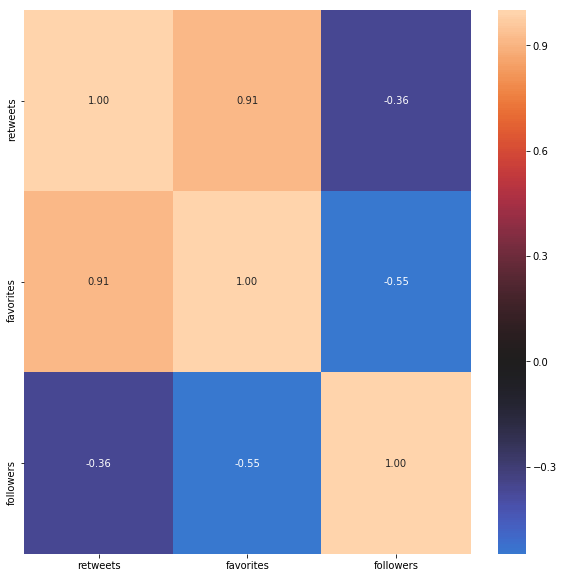

In [35]:
numeric_variable = ['retweets', 'favorites', 'followers']
plt.figure(figsize=[10,10])
graph1 = sb.heatmap(df[numeric_variable].corr(), annot = True, fmt = '.2f',
            center = 0);
fig1 = graph1.get_figure()
fig1.savefig('heatmapplot.png')


There is a clear positive link between favorites and retweets, so the more people retweet the tweet, the more likes we are likely to get 

Followers correlate negatively with both favourites and retweets, while favorites have a more negative association than retweet

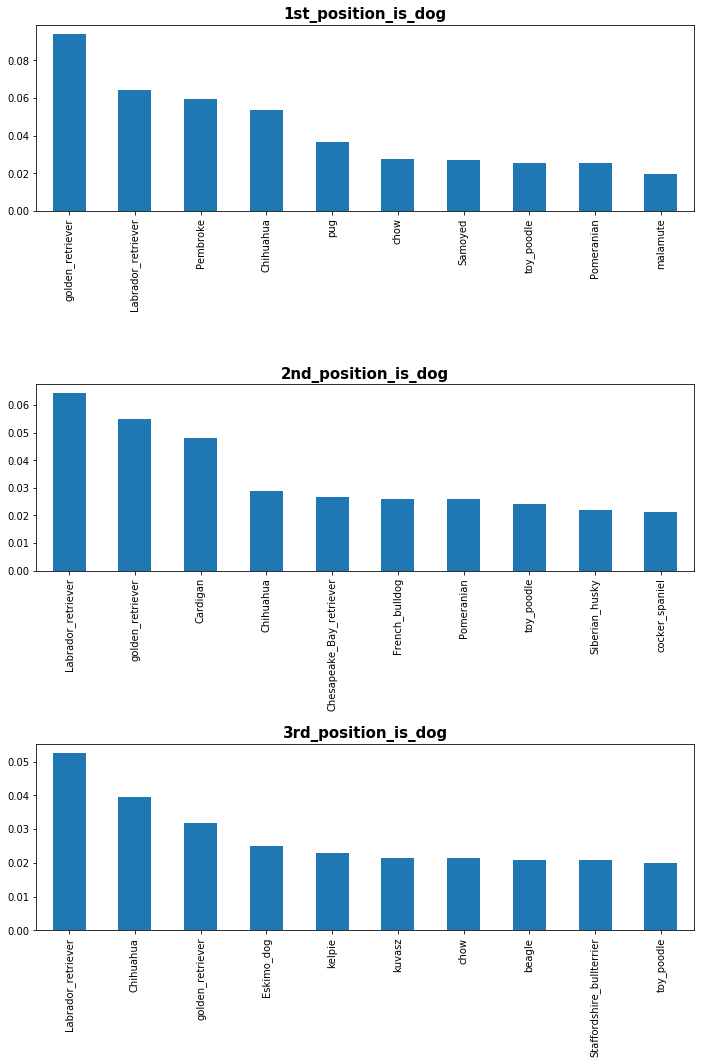

In [36]:
predictions = ['1st_position_is_dog','2nd_position_is_dog', '3rd_position_is_dog']
breeds = ['1st_position','2nd_position','3rd_position']
figu = plt.figure(figsize = [10, 15])
i=1

for j in predictions:
    plt.subplot(int(str(31)+str(i)))
    df2 = df[df[j] == True]
    df2[breeds[i-1]].value_counts(normalize= True)[:10].plot.bar(color = base_color);
    plt.title(j, fontweight="bold", fontsize = 15.0)
    i+=1
    
figu.tight_layout(pad= 1.5);
figu.savefig('breedplot.png')


We may say that labrador retriever and golden retriever are very good looking dog breeds from the above set of plots, as they are prominent in the amount of presence in the top 3

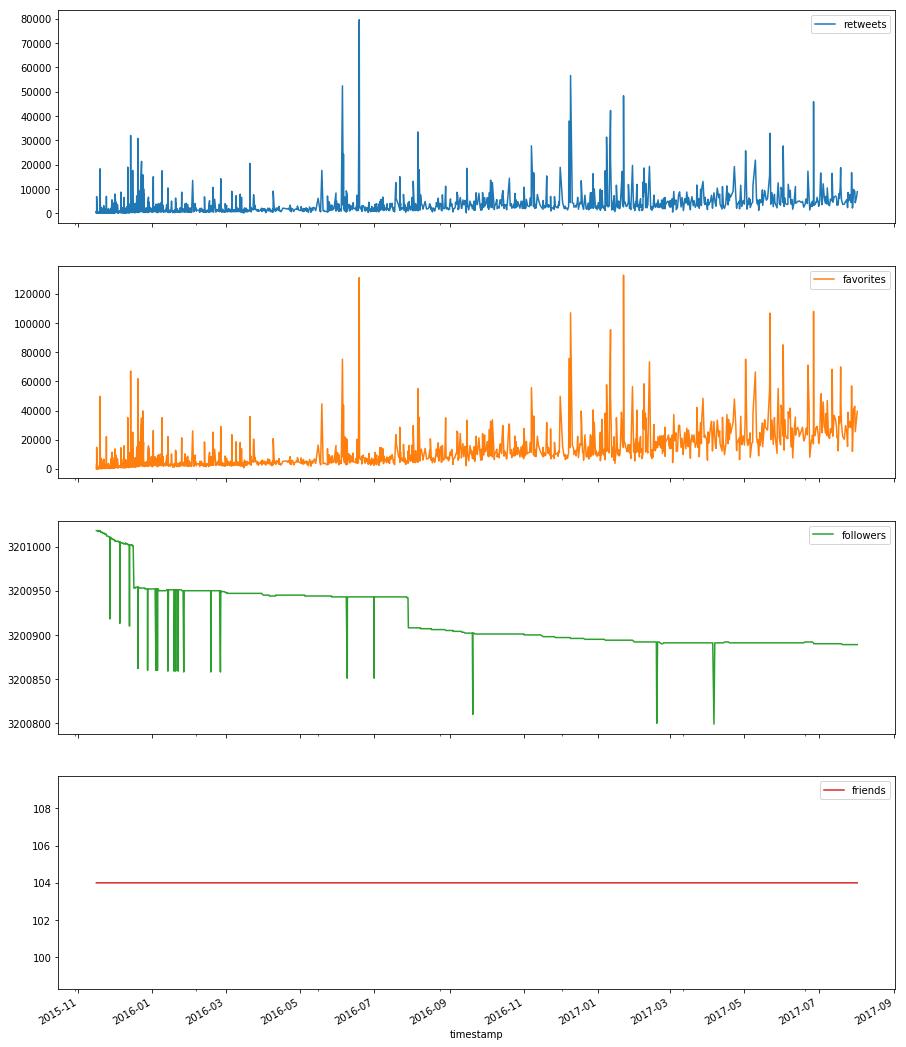

In [37]:
popularity = ['retweets','favorites', 'followers', 'friends']
greaph2 = df.plot( x= 'timestamp', y=popularity, subplots=True, figsize =(15,20) )


From the above graph, we can se that there was no correlating change in the number of likes and retweets as the year went on. but the number of folowers were noticed to decrease across the year and friends was kept constant

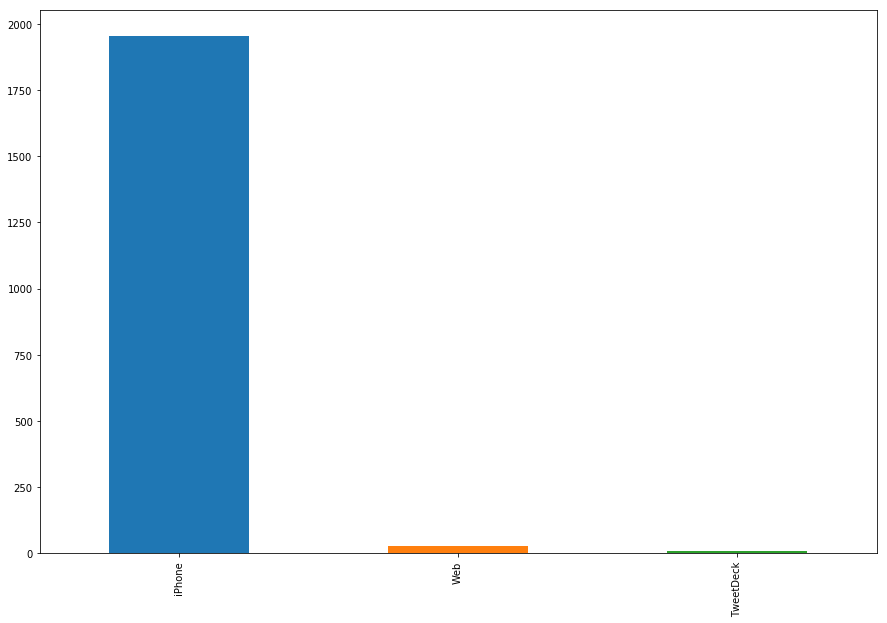

In [55]:
graph3 = df['source'].value_counts().plot(kind='bar',figsize= (15,10));

fig3 = graph3.get_figure()
fig3.savefig('source.png')

most of our users were iphone users

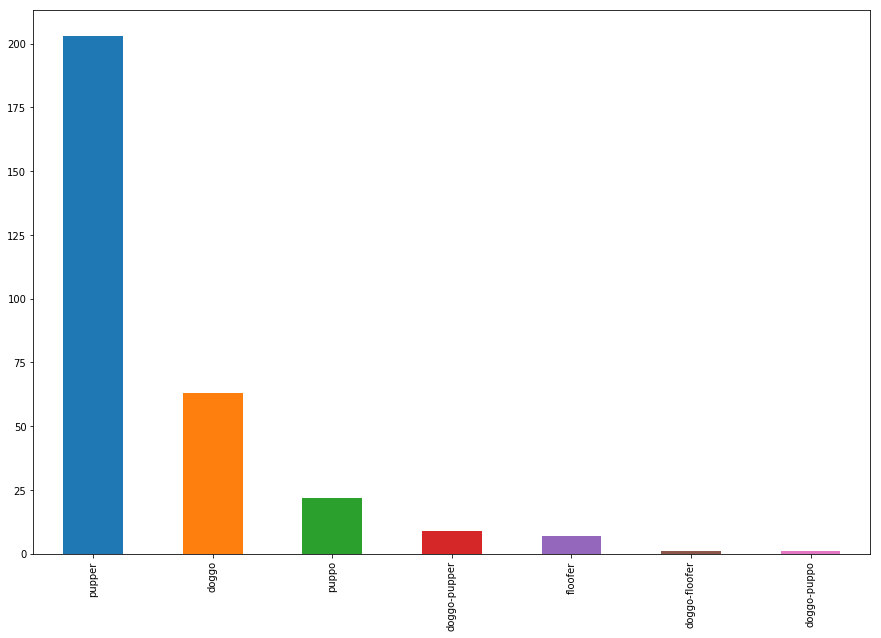

In [56]:
graph4 = df[df['dog_stages'] != 'None']['dog_stages'].value_counts().plot(kind='bar', figsize= (15,10));

fig4 = graph4.get_figure()
fig4.savefig('dog_stages.png')

Pupper is noticed to be the mopst common dog stage